In [40]:
# import tool set
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


In [41]:
# đọc dữ liệu từ link và đọc dưới dạng latin1
data = pd.read_csv("https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv",encoding="latin1")

In [42]:
# in 5 dòng đầu
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [43]:
# in thông tin tóm tắt cơ bản
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [44]:
# kiểm tra các giá trị NaN
data.isna().sum()
# kết luận: có 2 cột có chưa giá trị NaN, đó là Description (1454)
# và CustomerID(135080) trên tổng số 541909 record

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [45]:
# ví dụ một vài giá trị NaN. Chỉ cần trong record có 1 cell có NaN thì chọn
data.isna().sample(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
175050,False,False,False,False,False,False,False,False
477631,False,False,False,False,False,False,False,False
119422,False,False,False,False,False,False,False,False
107588,False,False,False,False,False,False,False,False
515486,False,False,False,False,False,False,True,False


In [46]:

data[data['Quantity']>0]
# chọn những dòng record có giá trị Quantity âm

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom


In [47]:
# Xuất ra tất cả dòng có Price âm
data[data['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/11 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/11 14:52,-11062.06,NaN,United Kingdom


The customer with the highest number of orders comes from United Kingdom (UK)

In [48]:
#The customer with the highest number of orders comes from the United Kingdom (UK)
# chọn ra những khách hàng từ United Kingdom
customer_UK = data[data['Country']=='United Kingdom']
# chọn ra khác hàng có số đơn hàng lớn nhất bằng cách đếm tất cả và chọn giá trị cao nhất
customer_UK['CustomerID'].value_counts().head(1)
# kết quả chứa CustomerID và số lượng đơn hàng của khách hàng đó

17841.0    7983
Name: CustomerID, dtype: int64

In [49]:
#The customer with the highest money spent on purchases comes from Netherlands: sẽ hiểu là số tiền cao nhất trên mỗi đơn hàng
# chọn ra các khách hàng tử netherlands
customer_NL = data[data['Country']=='Netherlands']

# thêm một cột là giá tiền của đơn hàng: UnitPrice * Quantity
c_len = len(customer_NL)
Cost  = []
for i in range(c_len):
    Cost.append(data['UnitPrice'][i] * data['Quantity'][i])
    
customer_NL['Cost'] = Cost
#chọn ra những đơn hàng có chi phí cao nhất đến từ Hà Lan

customer_NL['Cost'].value_counts().head(1)



C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


15.0    87
Name: Cost, dtype: int64

In [50]:
#On which year had the highest sales?
# chuyển từ kiểu dữ liệu string về kiểu datetime của pandas
data['InvoiceDate'] = pd.to_datetime(data.InvoiceDate)

# đếm số đơn hàng bán được trong từng năm và chọn năm có số lớn nhất
data.InvoiceDate.dt.year.value_counts().head(1)
# xuất ra năm có số đơn hàng lớn nhất và số đơn hàng của năm đó

2011    499428
Name: InvoiceDate, dtype: int64

In [51]:
#How many orders (per hour)?
data.InvoiceDate.dt.hour.value_counts()

12    78709
15    77519
13    72259
14    67471
11    57674
16    54516
10    49037
9     34332
17    28509
8      8909
18     7974
19     3705
20      871
7       383
6        41
Name: InvoiceDate, dtype: int64

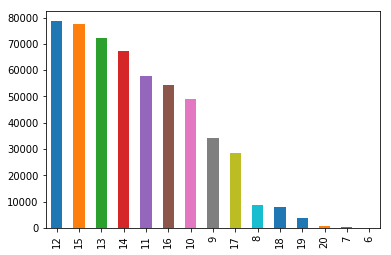

In [52]:
#Make a plot about number of orders per hour
data.InvoiceDate.dt.hour.value_counts().plot(kind = 'bar')

In [53]:
#How many orders (per month)?
data.InvoiceDate.dt.month.value_counts()

11    84711
12    68006
10    60742
9     50226
7     39518
5     37030
6     36874
3     36748
8     35284
1     35147
4     29916
2     27707
Name: InvoiceDate, dtype: int64

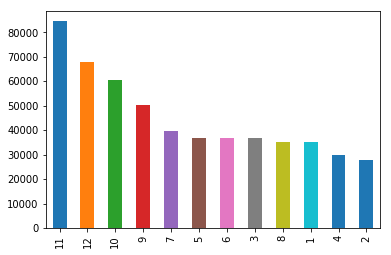

In [54]:
#Make a plot about number of orders per month
data.InvoiceDate.dt.month.value_counts().plot(kind = 'bar')

In [55]:
#Top 10 items most sales
data['Description'].value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: Description, dtype: int64

In [56]:
#Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK        

In [57]:
# nên tách các giá trị ngày giờ tháng năm ra thành các cột riêng để dễ sắp xếp và tính toán sau này
# em làm thử cách này nhưng em không hiểu, có lẽ lệnh truy vấn rắc rối quá nên đã gây ra lỗi bộ nhớ và máy tính báo thiếu bộ nhớ
#day = []
#month = []
#year = []
#hour = []
#for i in range(len(data)):
    #day.append(data.InvoiceDate.dt.day)
   # month.append(data.InvoiceDate.dt.month)
  #  year.append(data.InvoiceDate.dt.year)
 #   hour.append(data.InvoiceDate.dt.hour)
#data['Day'] = day
#data['Month'] = month
#data['Year'] = year
#data['Hour'] = hour